In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

In [155]:
site = "Storelva"  # Malselva or Storelva

start_date_dict = {"Malselva": "2018-01-01",
                   "Storelva": "2017-01-01"}  # Tho have data from 2016

## Read in sensor data

In [156]:
fpath = r'../data/sensor_%s.csv' % site

sensor_df_hourly = pd.read_csv(fpath, index_col=1, parse_dates=True, na_values="NA")
sensor_df_hourly = sensor_df_hourly.drop('station_name', axis=1)
sensor_df_hourly.columns = ["FDOM", "Conductivity", "pH", "T_water", "Turbidity"]
sensor_df_hourly

,FDOM,Conductivity,pH,T_water,Turbidity
datetime,,,,,
2015-02-26 12:42:00+00:00,69.279049,4.046,6.23,1.35,1.54
2015-02-26 13:42:00+00:00,69.591887,4.046,6.23,1.40,1.53
2015-02-26 14:42:00+00:00,69.539249,4.056,6.23,1.39,1.52
2015-02-26 15:42:00+00:00,69.614022,4.041,6.22,1.39,1.50
2015-02-26 16:42:00+00:00,69.757939,4.039,6.22,1.37,1.50
...,...,...,...,...,...
2021-12-31 20:46:00+00:00,71.688667,4.028,6.25,2.34,1.12
2021-12-31 21:46:00+00:00,71.798334,3.981,6.25,2.34,1.08
2021-12-31 22:46:00+00:00,NaN,3.966,6.25,2.31,1.13


In [157]:
sensor_df = sensor_df_hourly.resample('D').mean()
# Drop time info for joining and plotting
sensor_df.index = sensor_df.index.date
sensor_df

,FDOM,Conductivity,pH,T_water,Turbidity
2015-02-26,69.595352,4.119083,6.225000,1.400000,1.491667
2015-02-27,67.025360,4.123375,6.220833,1.477083,3.252917
2015-02-28,68.732431,4.108458,6.210417,1.515417,2.157500
2015-03-01,65.579051,4.167583,6.112500,1.657083,4.586667
2015-03-02,67.321326,4.019708,NaN,1.737917,3.395000
...,...,...,...,...,...
2021-12-27,69.972898,3.979625,6.125833,1.400417,1.055000
2021-12-28,70.877661,3.965333,6.180833,1.825000,1.190417
2021-12-29,70.688119,3.807042,6.212500,2.008333,1.149167
2021-12-30,71.515138,4.000500,6.243750,2.283750,1.053750


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

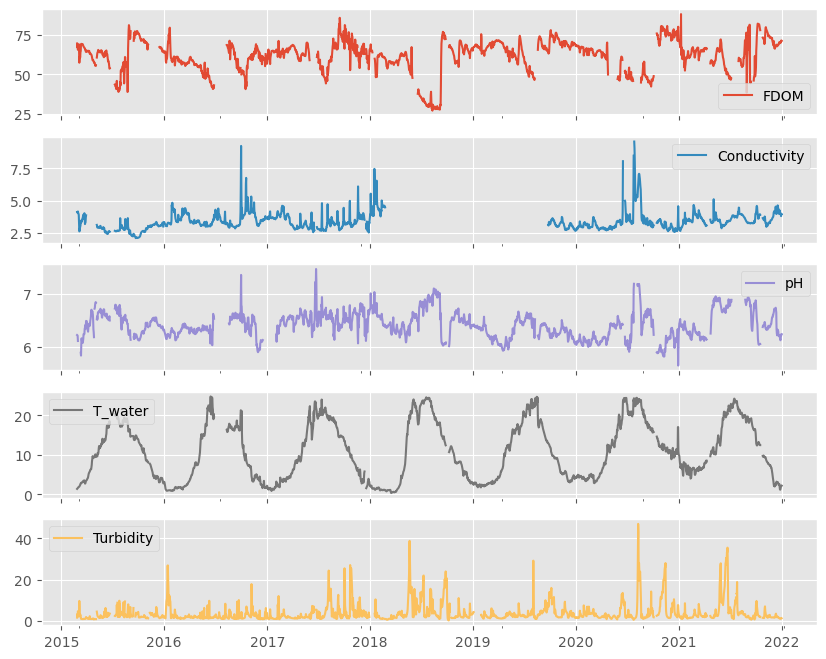

In [158]:
sensor_df.plot(subplots=True, sharex=True, figsize=(10, 8))

## Read in met data

In [159]:
met_fpath = r"../data/Climate_%s_daily.csv" % site
met_df = pd.read_csv(met_fpath, index_col=0, parse_dates=True, dayfirst=False)
met_df = met_df[['par', 'value_mean']]
met_df = met_df.pivot(columns='par')
met_df = met_df.droplevel(level=0, axis=1)
met_df.columns = ['Pptn', 'T_air']
met_df.index = met_df.index.date  # Drop time info
met_df

,Pptn,T_air
2015-01-01,0.0,2.5
2015-01-02,1.3,6.7
2015-01-03,2.1,2.8
2015-01-04,0.4,1.1
2015-01-05,0.0,-0.8
...,...,...
2021-12-27,0.0,-12.3
2021-12-28,1.8,-6.3
2021-12-29,3.3,-4.9
2021-12-30,7.3,-3.8


## Read in discharge data

In [160]:
q_df = pd.read_csv(r'../data/Discharge_%s.csv' % site, index_col=0, parse_dates=True)

# Drop time info for joining and plotting
q_df.index = q_df.index.date

q_series = q_df['value']
q_series.name = 'Q'
q_series

2015-01-01    5.250791
2015-01-02    5.574467
2015-01-03    5.959798
2015-01-04    5.508568
2015-01-05    5.239527
                ...   
2021-12-26    8.619706
2021-12-27    8.003234
2021-12-28    7.935480
2021-12-29    7.616905
2021-12-30    7.498725
Name: Q, Length: 2556, dtype: float64

**Maeve's Q data is missing the last day of the series. Doesn't matter for now, but in future re-do with raw NVE data**

## Read in grab sample water chem data

In [161]:
chem_df = pd.read_csv(r'../data/waterchem_%s.csv' % site, index_col=1, parse_dates=True)
chem_df.drop(chem_df.columns[0], axis=1, inplace=True)
# Drop rows where there were no samples at all
chem_df.dropna(axis=0, how="all", inplace=True)
chem_df['grab_sample'] = True
# Drop time info for joining and plotting
chem_df.index = chem_df.index.date
chem_df.head()

,pH,Conductivity_mS_m,SPM_mg_L,TOC_mg_L,Turbidity_NTU,PO4_ug_L,TP_ug_L,NO3_ug_L,NH4_ug_L,TN_ug_L,Si_mg_L,Ca_mg_L,DOC_mg_L,PartC_ug_L,PartN_ug_L,TDP_ug_L,grab_sample
2017-02-06,6.29,3.12,1.74,6.0,1.10,2.0,7,200,32.0,430.0,1.68,1.72,5.9,NaN,NaN,2.0,True
2017-03-08,6.36,2.81,1.40,5.8,1.10,NaN,12,200,8.0,440.0,1.62,1.55,5.8,518.0,34.8,2.0,True
2017-04-04,6.35,2.65,1.56,5.8,0.82,1.0,7,250,15.0,400.0,1.55,1.54,5.6,295.0,22.2,3.0,True
2017-05-02,6.40,2.96,2.48,5.8,1.80,3.0,7,250,25.0,440.0,1.36,1.66,5.5,439.0,37.3,2.0,True
2017-06-12,6.52,2.89,2.46,7.3,1.50,5.0,6,100,22.0,400.0,1.20,1.51,7.1,634.0,81.9,3.0,True


# Join data

In [162]:
df_li = [met_df, q_series, sensor_df, chem_df['grab_sample']]
df = pd.concat(df_li, axis=1, sort=True)

# Fill in 0s for days when there weren't grab samples
df.loc[df['grab_sample'] != 1, 'grab_sample'] = False

index = pd.to_datetime(df.index, yearfirst=True)
df.index = index

# Truncate to start on 01/01/2017
start_date = start_date_dict[site]
df = df.loc[start_date:]

df

,Pptn,T_air,Q,FDOM,Conductivity,pH,T_water,Turbidity,grab_sample
2017-01-01,0.0,6.4,5.536927,58.132773,3.619708,NaN,2.077500,2.420000,False
2017-01-02,0.0,0.5,5.414372,62.183366,3.643500,NaN,1.630417,1.115000,False
2017-01-03,0.0,-2.3,5.180399,62.467559,3.646000,NaN,1.435000,1.151250,False
2017-01-04,0.0,2.4,4.959430,62.341627,3.577708,NaN,1.616667,1.078750,False
2017-01-05,0.0,-3.2,4.556522,65.758922,3.779208,NaN,1.260000,1.041250,False
...,...,...,...,...,...,...,...,...,...
2021-12-27,0.0,-12.3,8.003234,69.972898,3.979625,6.125833,1.400417,1.055000,False
2021-12-28,1.8,-6.3,7.935480,70.877661,3.965333,6.180833,1.825000,1.190417,False
2021-12-29,3.3,-4.9,7.616905,70.688119,3.807042,6.212500,2.008333,1.149167,False
2021-12-30,7.3,-3.8,7.498725,71.515138,4.000500,6.243750,2.283750,1.053750,False


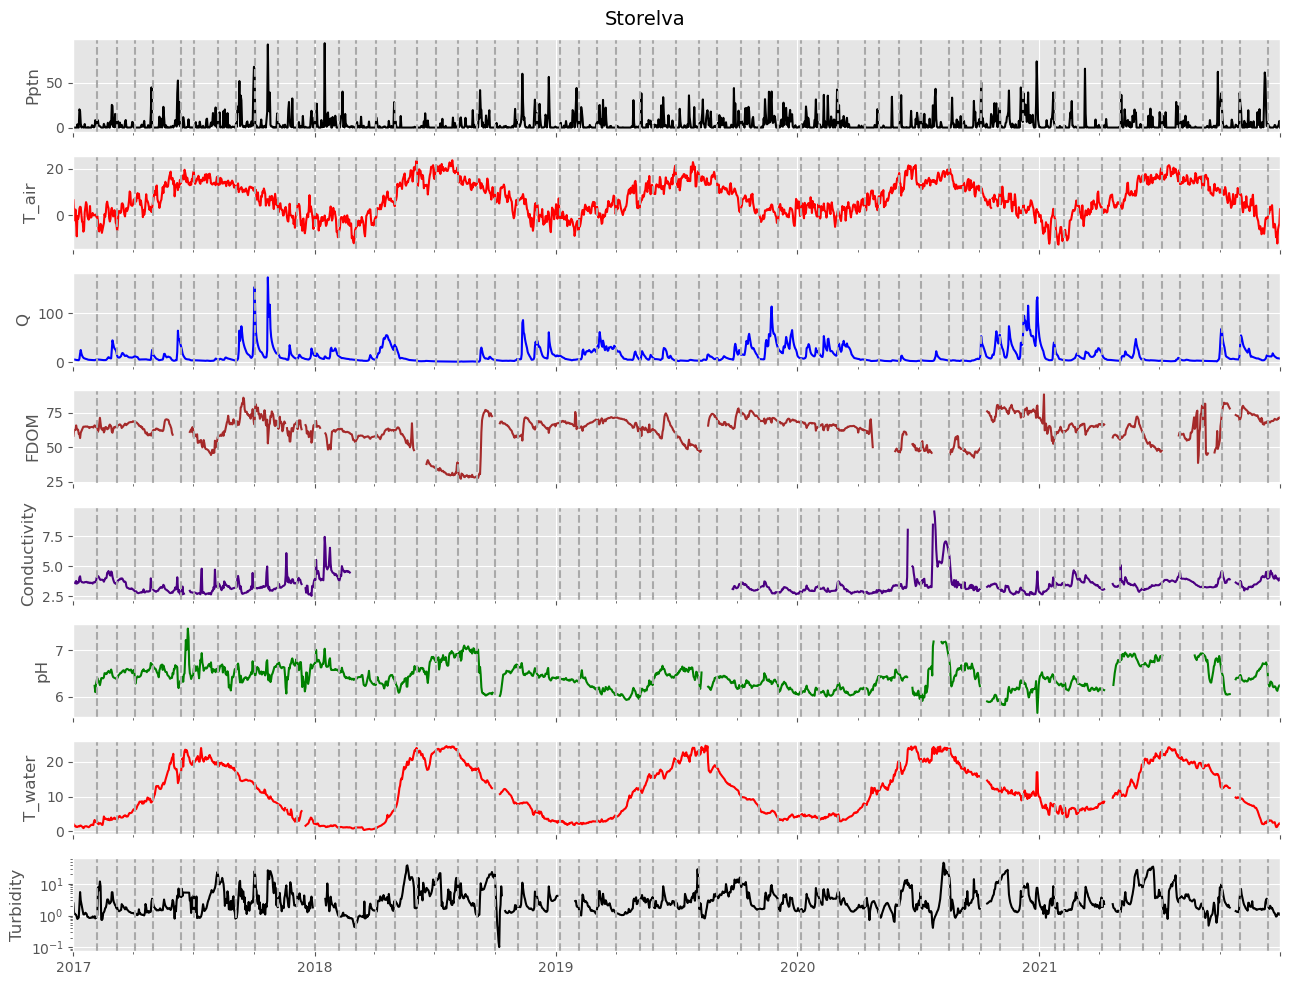

In [163]:
colours = ['black', 'red', 'blue', 'brown', 'indigo', 'green', 'red', 'black']

axs = df.plot(subplots=True, legend=False, figsize=(13, 10), style=colours);
for i, ax in enumerate(axs):
    var = df.columns[i]
    axs[i].set_ylabel(df.columns[i])
    if var=='Turbidity':
        axs[i].set_yscale("log")
    samp_dates = df.loc[df['grab_sample'] == True].index.values
    for date in samp_dates:
        ax.axvline(date, color='darkgray', linestyle='--')

plt.suptitle("%s" %site, size=14);
plt.tight_layout()

plt.savefig(r'../figures/timeseries_all-data_%s.png' %site)

# Basic exploratory plots

## Boxplots of sensor and grab sample data

# To do

* Add season to joined df
* Boxplots grouped by season, plus for grab samples to compare
* Correlation between air temp, discharge and sensor data, incl. GoF stats
* Split into different periods: baseflow, snow melt, summer/autumn flow events
* QC relationships for whole period vs the 3 different periods? Plots, summary stats.
* Timeseries of individual events to demonstrate value of sensor data: multi-peak freshet, late summer flow event
* Look at data frequency (grab samples) during different years.
* Fluxes over melt events for different sampling frequencyes.
* Time series of one or two multi-peak freshets, showing how sensor data gives insights into processes.
* CQ plots with grab data or with sensor data? Split by events, season,... (heading into paper territory here though)